# Airbnb (Price Regressor Model using Random Forest)

### Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Treatment](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Price](#section401)<br>
    - 4.2 [Host](#section402)<br>
    - 4.3 [Neighbourhood group, Room type and price](#section403)<br>
    - 4.4 [Lattitude, Longiture host listing distribution](#section404)<br>
    - 4.5 [Reviews and price](#section405)<br>
    - 4.3 [Correlation](#section406)<br>
5. [Random Forest Regression](#section5)<br>
    - 5.1 [Standardization of independant varible](#section501)<br>
    - 5.2 [Preparing X and y using pandas](#section502)<br>
    - 5.3 [Splitting X and y into training and test datasets](#section503)<br>
    - 5.4 [Random forest regression in scikit-learn](#section504)<br>
    - 5.5 [Using the Model for Prediction](#section505)<br>
    - 5.6 [Feature Selection](#section506)<br>
6. [Model evaluation](#section6)<br>
    - 6.1 [Root Mean Squared Error](#section601)<br>
    - 6.2 [Rsquared value.](#section602)<br>
    - 6.3 [Model 1 Evaluation](#section603)<br>
    - 6.4 [Model 2 Evaluation](#section604)<br>
    - 6.5 [Observation](#section605)<br>
    - 6.6 [Residual Distribution](#section606)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict the price__ of the accommodations. The analysis will also help understanding the busy neighbourhood and the need for  accommodations, which will increase the listing in turn the revenue.  Using __Random Forest Regresser__ model for the predictions.

<a id=section2></a>

<a id=section2></a>

### 2. Data Description

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This public dataset is a part of Airbnb describing the listing activity and metrics in NYC, NY for 2019.

This data file includes 48895 samples and 16 metrics to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

| Column Name                     | Description                                           |
| -------------                   |:-------------                                        :| 
| id                              | listing ID                                            | 
| name                            | name of the listing                                   |  
| host_id                         | host ID                                               | 
| host_name                       | name of the host                                      |   
| neighbourhood_group             | location                                              |
| neighbourhood                   | area                                                  |
| latitudelatitude                | coordinates                                           |
| longitudelongitude              | coordinates                                           |
| room_type                       | listing space type                                    |
| price                           | price in dollars                                      |
| minimum_nights                  | amount of nights minimum                              |
| number_of_reviews               | number of reviews                                     |
| last_review                     | latest review                                         |
| reviews_per_month               | number of reviews per month                           |
| calculated_host_listings_count  | amount of listing per host                            |
| availability_365                | number of days when listing is available for booking  |

#### Load packages and data

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                           
# Allow plots to appear directly in the notebook

from sklearn import metrics                                   
from IPython.core.display import display, HTML                 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML                                 
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

In [5]:
#Importing dataset using pd.read_csv
data = pd.read_csv('https://raw.githubusercontent.com/Ranjini-G/Airbnb_ML-Model/master/AB_NYC_2019.csv')    
data.head()                                                  #Gives the first five rows of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<a id=section2></a>

<a id=section3></a>

### 3. Data profiling and treatment

Review the shape, datatypes and sample data to understand what variables we are dealing with. The variables need to be transformed before the analysing them.

In [6]:
data.shape                       #Gives the number of rows and columns in the dataframe

(48895, 16)

In [7]:
data.info()                      #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [8]:
data.isnull().sum()                   # Look for null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
pandas_profiling.ProfileReport(data)  

Number of variables,16
Number of observations,48895
Total Missing (%),2.6%
Total size in memory,6.0 MiB
Average record size in memory,128.0 B
Numeric,10
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Observations

Columns __"id", "name"__ and __"host_name"__ are irrelevant and insignificant to our data analysis, columns __"last_review"__ and __"review_per_month"__ need very simple handling. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [11]:
data.drop(['id','name','host_name'], axis=1, inplace=True)         #Droping id, name and host name columns as these are not going to help us with insights

In [12]:
data['last_review'] = pd.to_datetime(data['last_review'])          #Filling the missing last review date with the earliest review date
earliest = min(data['last_review'])
data['last_review'] = data['last_review'].fillna(earliest)

In [13]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)           #NaN are filled with zero, as there were no review in the given month

In [14]:
data.head()                                     # Display the first five rows of the data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-03-28,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
pandas_profiling.ProfileReport(data)  

Number of variables,13
Number of observations,48895
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,104.0 B
Numeric,9
Categorical,3
Boolean,0
Date,1
Text (Unique),0
Rejected,0


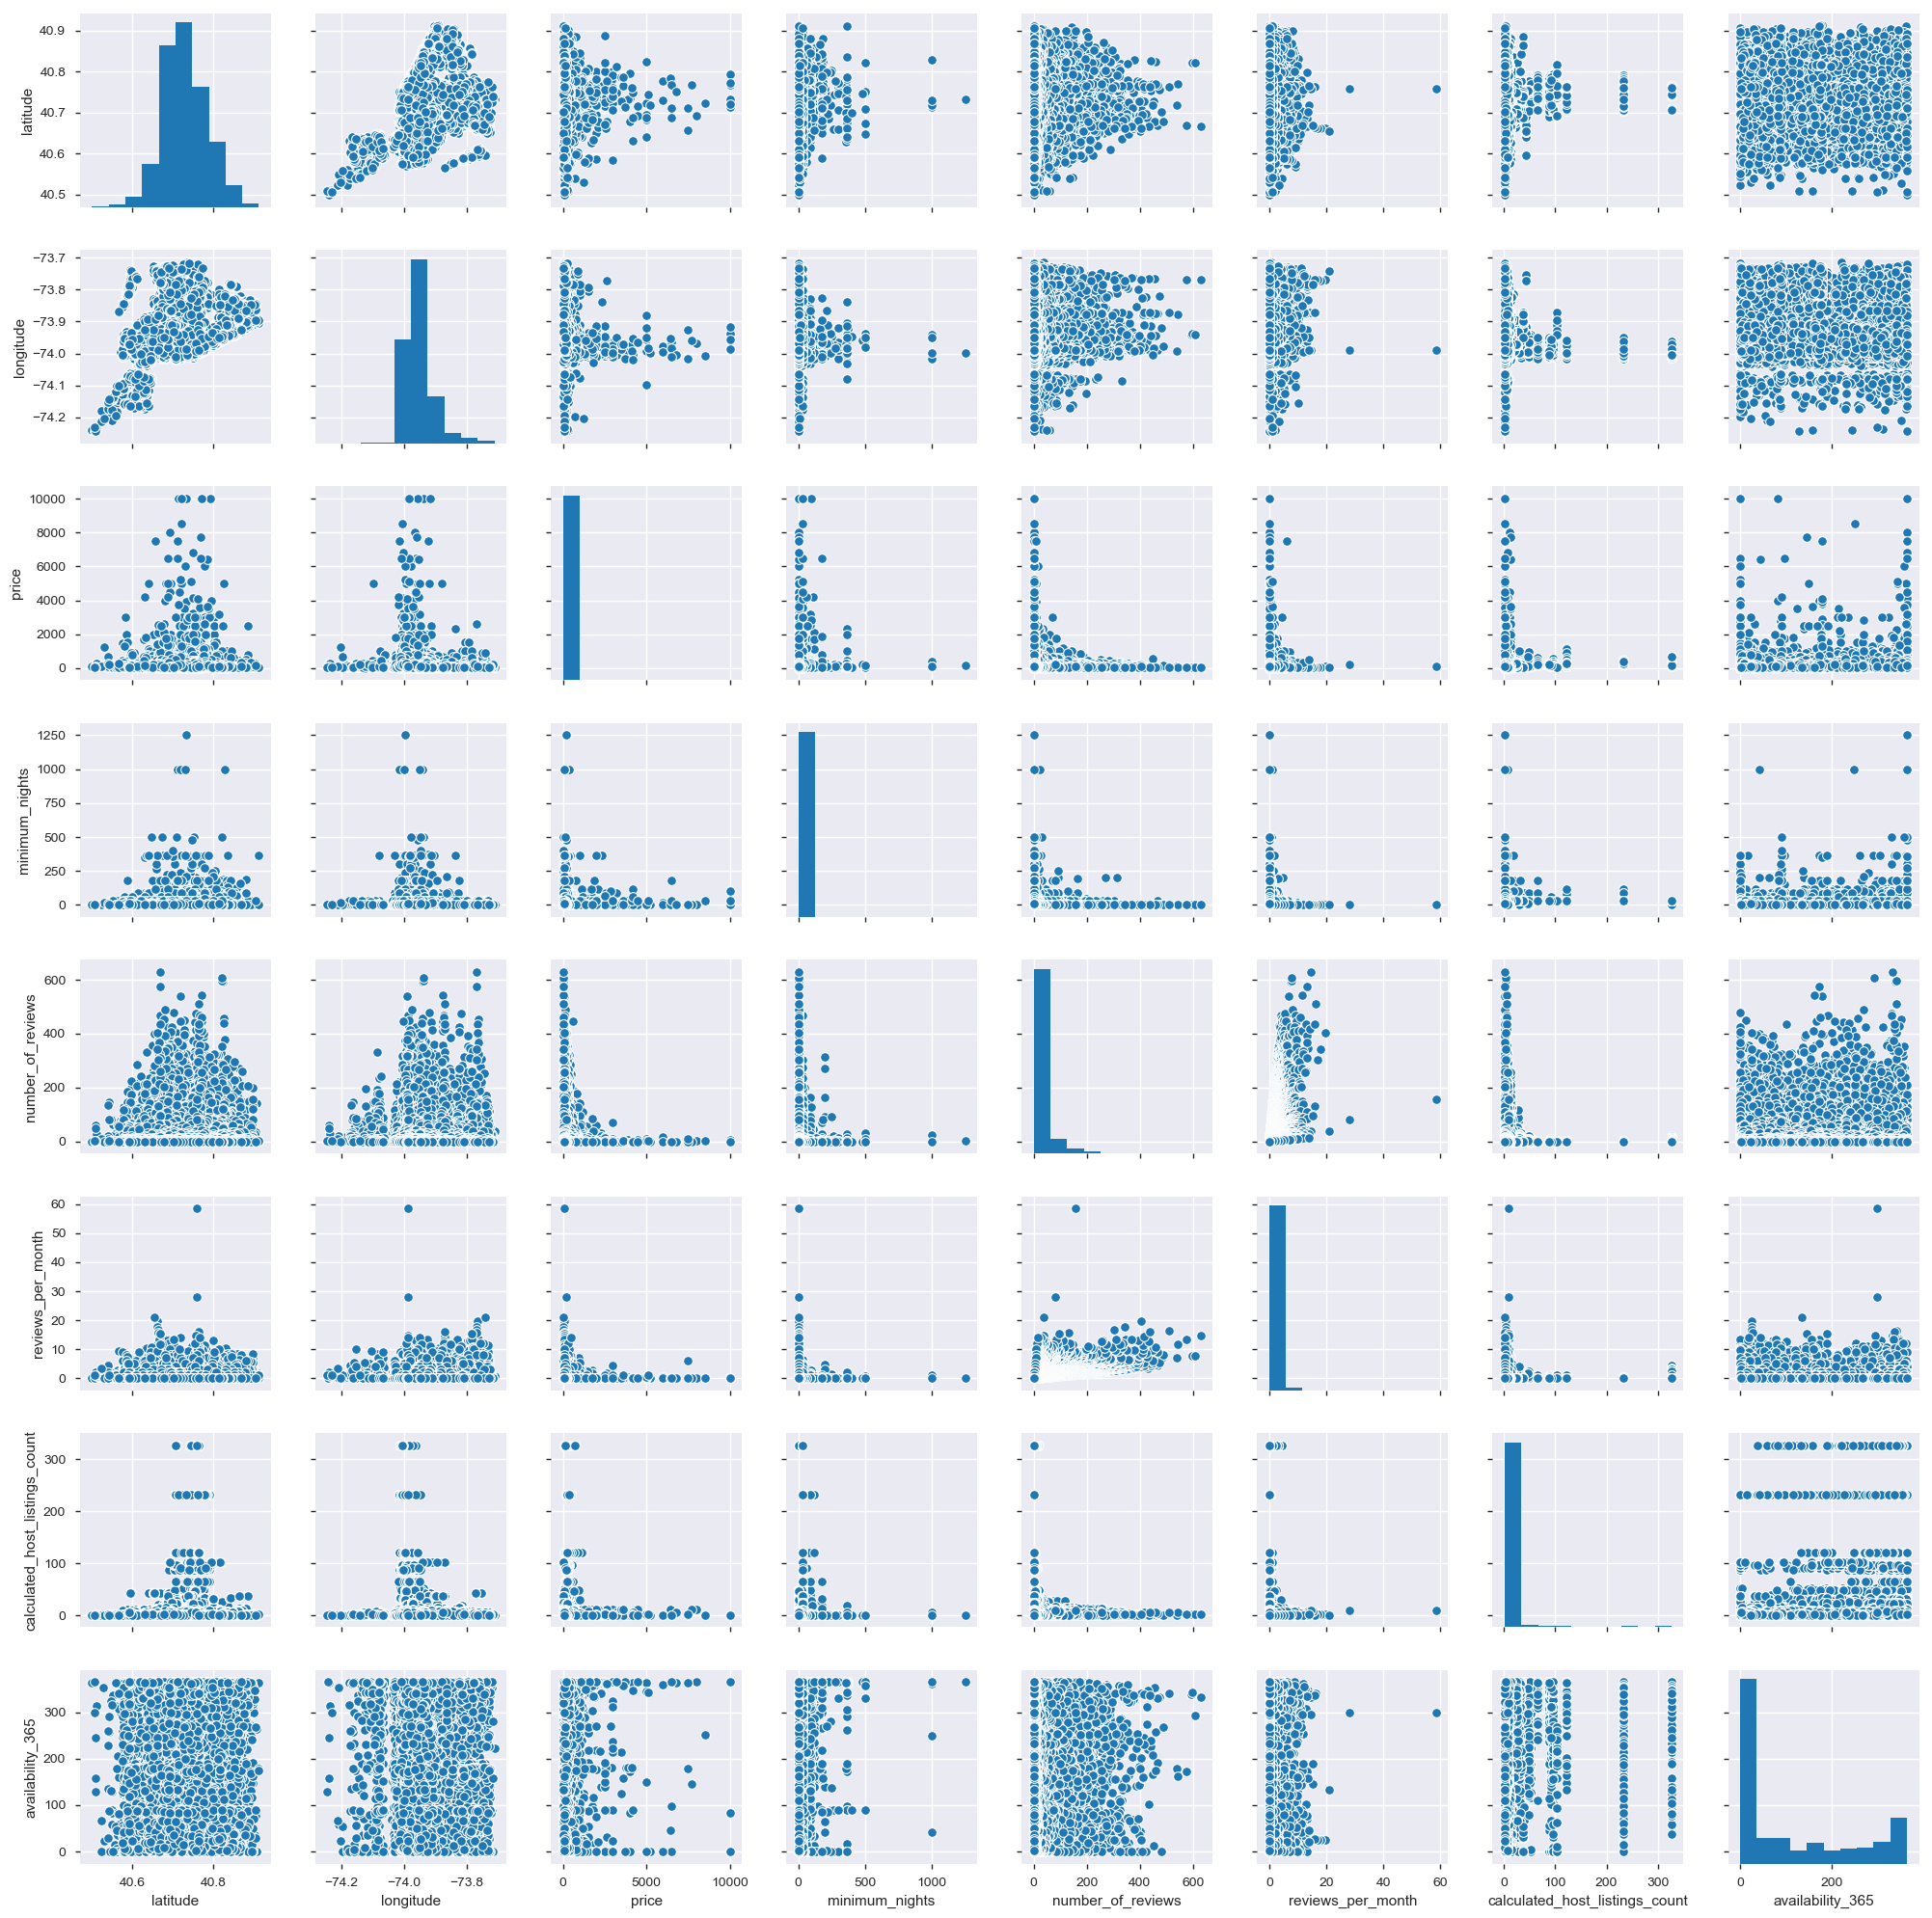

In [56]:
sns.pairplot(data.select_dtypes(exclude=['object']))

<a id=section4></a>

<a id=section3></a>

<a id=section4></a>

### 4. Exploratory Data Analysis

Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results

<a id=section401></a>

### 4.1 Price

Text(0.5, 1.0, 'Log transformed price')

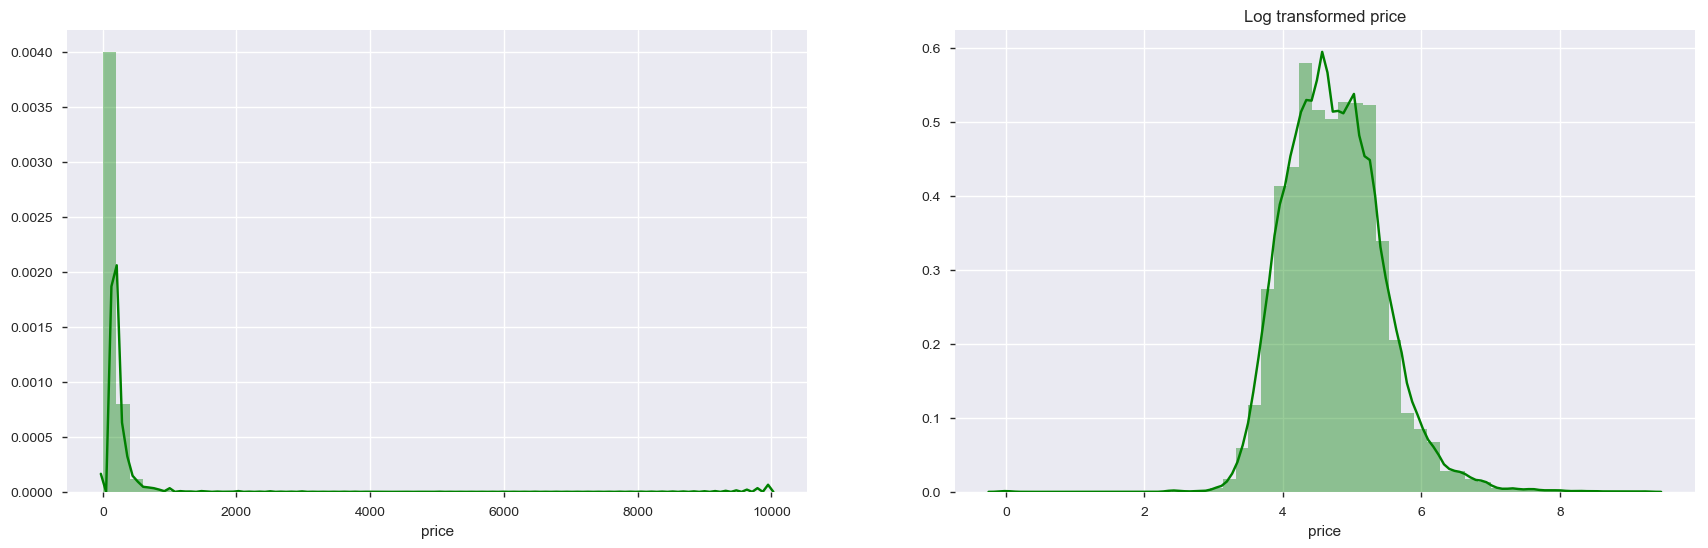

In [16]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(data['price'], ax = axes[0], color='g')
#plt.title('Distribution of price')
sns.distplot(np.log1p(data['price']), ax = axes[1], color='g')
plt.title('Log transformed price')

Price is the dependant variable and has got too many outliers.  log transform of price brings the data to normal distribution

<a id=section401></a>

<a id=section402></a>

### 4.2 Host

In [17]:
#Checking which hosts (IDs) have the most listings on Airbnb platform
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

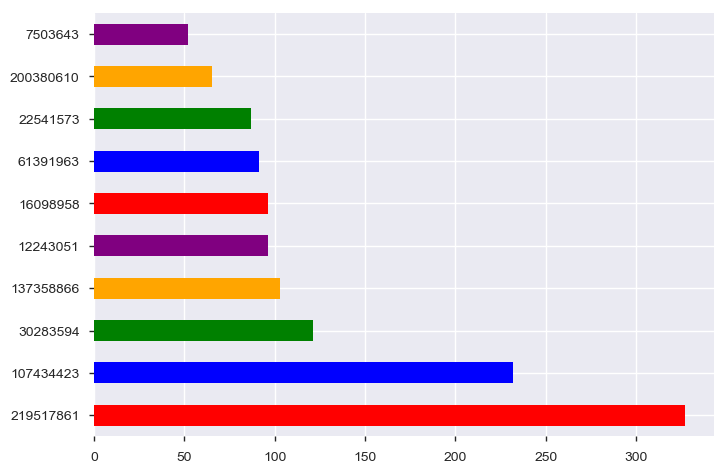

In [18]:
top_host.plot.barh(color=['red','blue','green','orange','purple'])

We can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.

<a id=section402></a>

Understanding unique values and categorical data that we have in our dataset was the last step we had to do. It looks like for those columns values we will be doing some mapping to prepare the dataset for predictive analysis.

<a id=section403></a>

### 4.3 Neighbourhood group, Room type and price

In [19]:
data['neighbourhood_group'].unique()              # Check the different locations

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

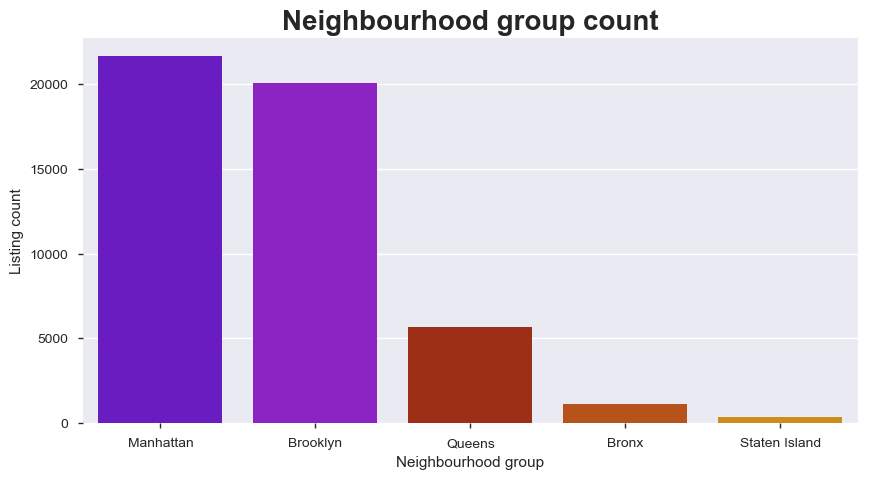

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('neighbourhood_group', data = data, order = data['neighbourhood_group'].value_counts().index,palette="gnuplot")
plt.title("Neighbourhood group count",fontsize=20,fontweight="bold")
plt.ylabel("Listing count")
plt.xlabel("Neighbourhood group")
plt.show()

The neighbourhood group has five areas.  Manhattan has got the highest number of hosting followed by Brookly.  Staten island with the least number of hostings.  With this data, it can be said that most tourists prefer to stay at Manhattan so is the hostings.

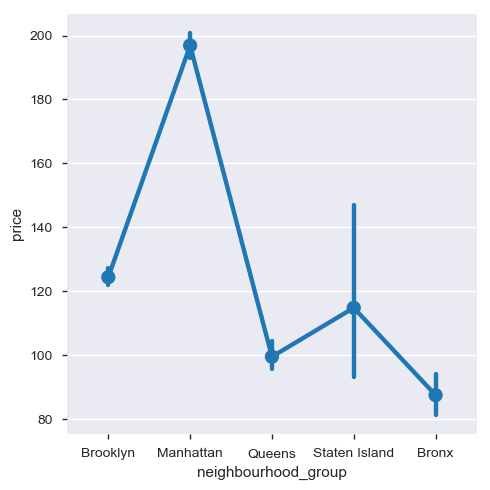

In [21]:
sns.catplot('neighbourhood_group','price',kind='point',data=data)
plt.show()

We observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings followed by Brooklyn. Bronx is the cheapest of them all.

In [22]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

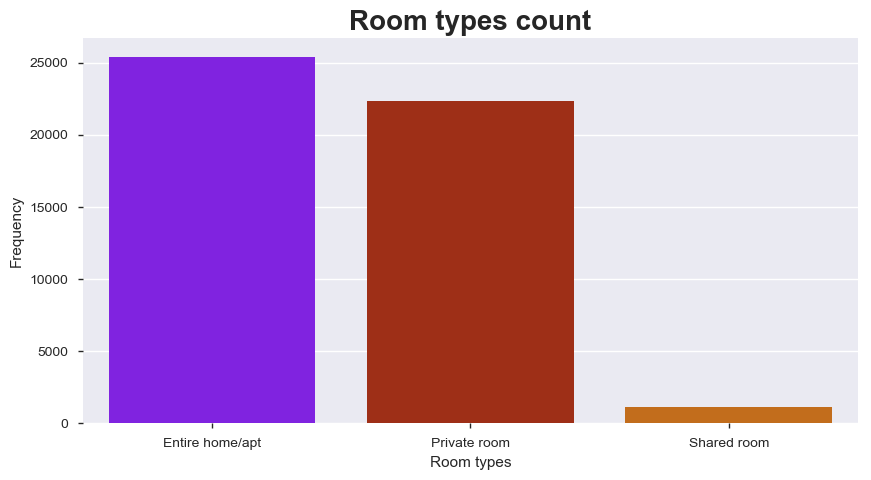

In [23]:
plt.figure(figsize=(10,5))
sns.countplot('room_type', data = data, order = data['room_type'].value_counts().index,palette="gnuplot")
plt.title("Room types count",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Room types")
plt.show()

After checkin the unique room types and plotting them, we understand that Entire home/apt is the highest in count followed by Private room and shared room respectively.

### Dummification

In [24]:
nebr_dummies = pd.get_dummies(data.neighbourhood_group, prefix='nebr').iloc[:, 1:]  # create four dummy variables using get_dummies
nebr_dummies.head()

,nebr_Brooklyn,nebr_Manhattan,nebr_Queens,nebr_Staten Island
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [25]:
room_dummies = pd.get_dummies(data.room_type, prefix='room').iloc[:, 1:]  #create four dummy variables using get_dummies
room_dummies.head()

,room_Private room,room_Shared room
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


Text(0.5, 1.0, 'Room type and Area')

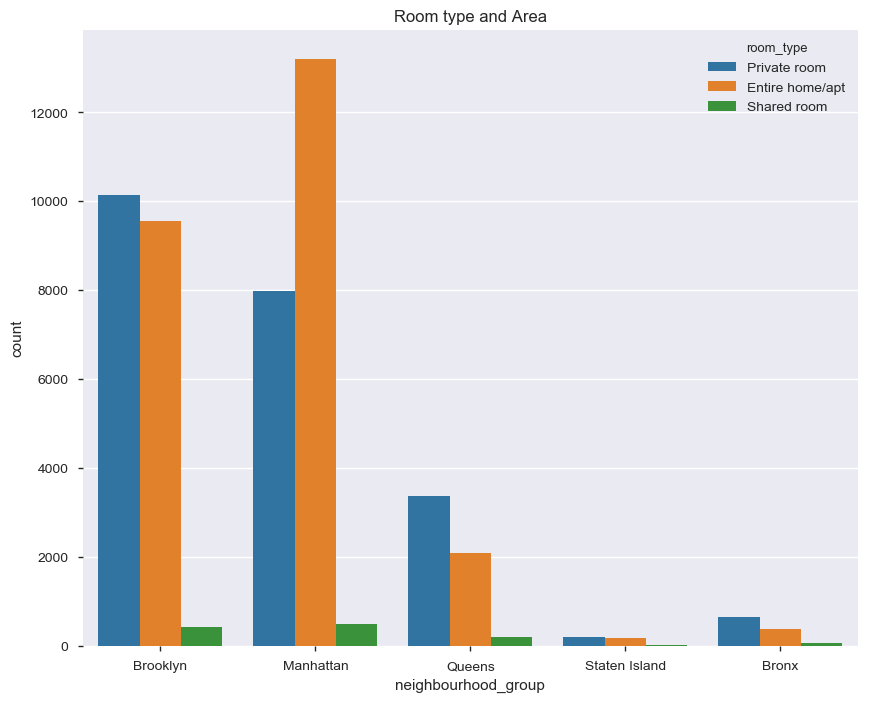

In [26]:
fig,ax =plt.subplots(figsize=(10,8))
sns.countplot(data = data,x = 'neighbourhood_group', hue= 'room_type')
plt.title('Room type and Area')

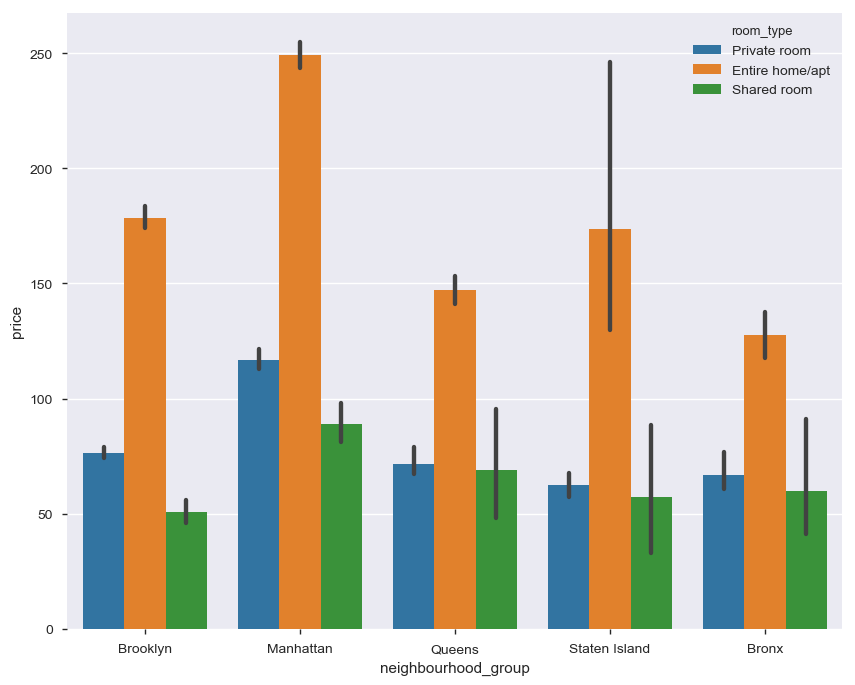

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data)
plt.show()

Listings in Manhattan have got the highest price range for all the three room types.  

Entire home/apt is the favourite option of customers in all the locations.  The other room types vary in count based on the locality.

<a id=section403></a>

<a id=section404></a>

### 4.4 Lattitude, Longiture host listing distribution

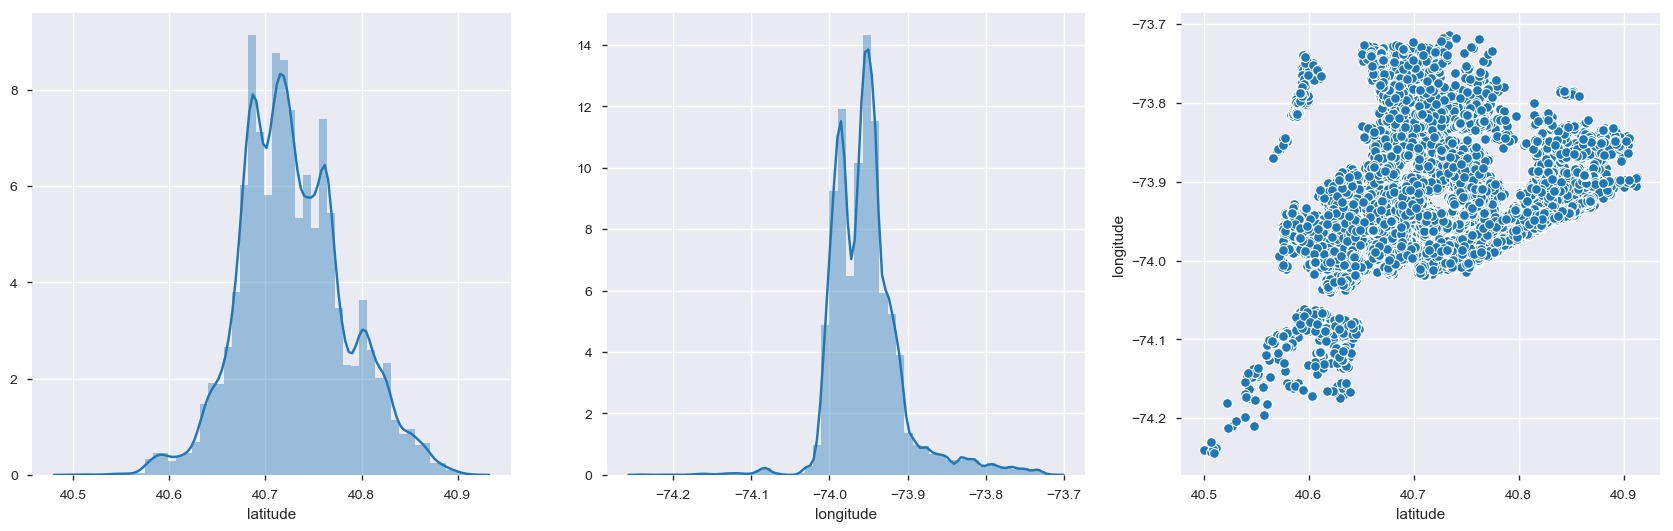

In [28]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(data['latitude'], ax=axes[0])
sns.distplot(data['longitude'], ax=axes[1])
sns.scatterplot(x= data['latitude'], y=data['longitude'])

We have plotted the lattitue and logitude induvidually and against each other.  There is nothing much that we can draw from this.  Moving on to the reviews.

<a id=section404></a>

<a id=section405></a>

### 4.5 Reviews and price

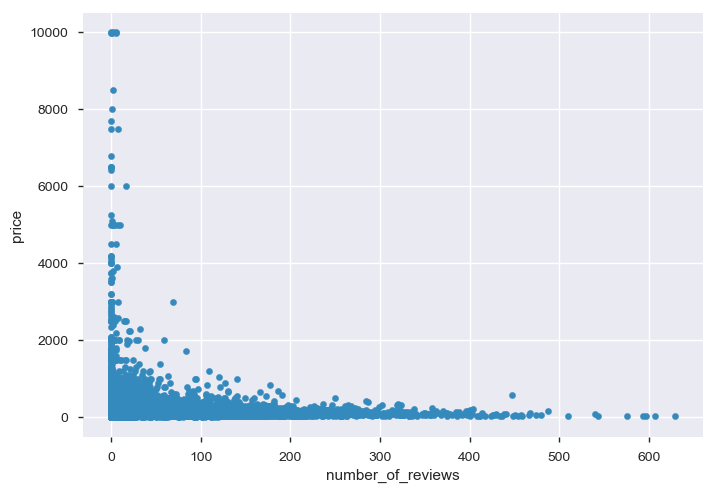

In [29]:
data.plot.scatter(y='price', x='number_of_reviews')

Most of the reviews are concentrated between 0 and 1000.  To get better understanding filtering further to check the reviews under price of 1000.

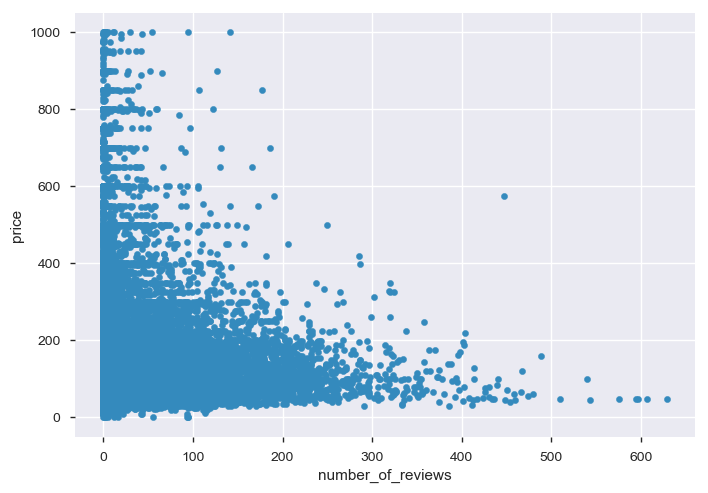

In [30]:
data[data['price'] < 1000].plot.scatter(y='price', x='number_of_reviews')

From this scatter plot we observe that most customers are reviewing properties in price range of 0 to 300.  This also helps us understand most travellers prefer the accommodation with this price range.  So increasing the listing in this price range will help gain more market and revenue.

<a id=section405></a>

<a id=section406></a>

### 4.6 Correlation

Text(0.5, 1.0, 'Correlation between features')

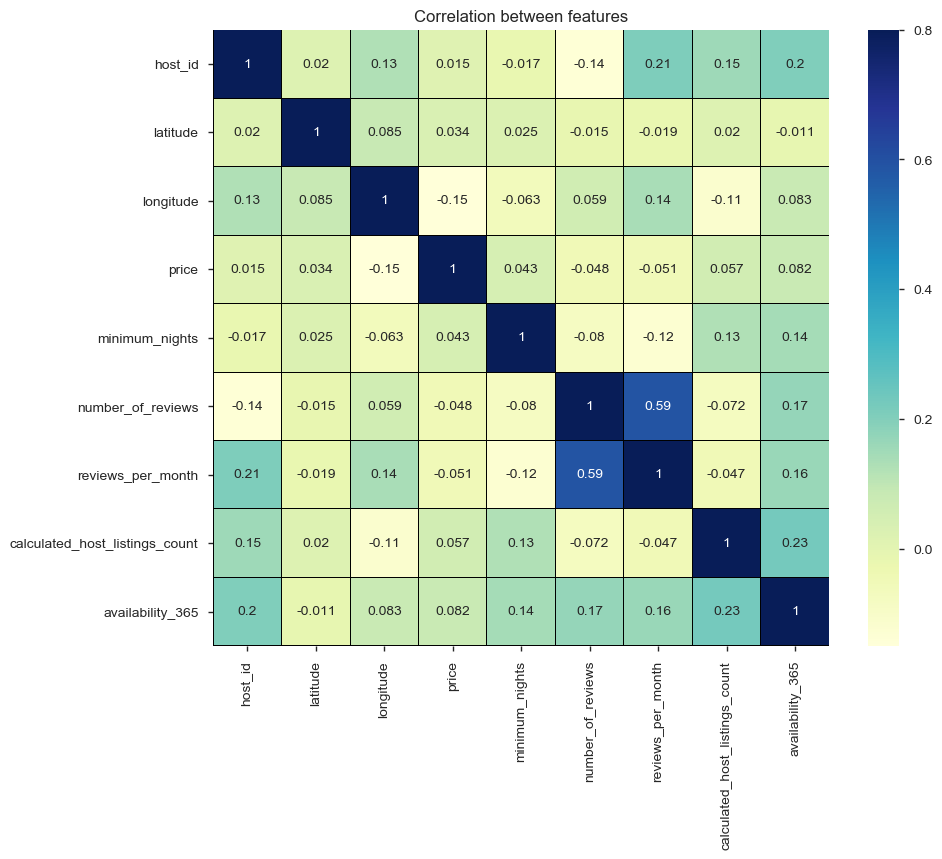

In [31]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

With the help of the heatmap we can see the correlation between the various parameters of the dataset.  Multicollinearity is observed with two independent variables. i.e., number_of_reviews and reviews_per_month are highly correlated.  Dropping one these will help us proceed further with the model prediction.  

<a id=section406></a>

<a id=section4></a>

<a id=section5></a>

### 5. Random Forest Regression

In [32]:
data.sample()               #checking the sample of the dataset

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11429,3758073,Brooklyn,Prospect-Lefferts Gardens,40.65783,-73.9567,Private room,60,3,9,2018-07-28,0.2,1,0


In [33]:
data.drop(['host_id','neighbourhood_group','neighbourhood','last_review','room_type'], axis=1, inplace=True)

In [34]:
data_new = pd.concat([nebr_dummies, room_dummies], axis = 1)
data1 = pd.concat([data, data_new], axis = 1)

In [35]:
data1.sample()        #Examining the changes

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nebr_Brooklyn,nebr_Manhattan,nebr_Queens,nebr_Staten Island,room_Private room,room_Shared room
13892,40.68858,-73.95387,70,1,0,0.0,1,0,1,0,0,0,1,0


In [36]:
data1.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'nebr_Brooklyn', 'nebr_Manhattan', 'nebr_Queens',
       'nebr_Staten Island', 'room_Private room', 'room_Shared room'],
      dtype='object')

<a id=section501></a>

### 5.1 Standardization of independant varible

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data1)
data2 = scaler.transform(data1)

C:\Users\Ranjini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ranjini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
rfreg = pd.DataFrame(data2)
rfreg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,1.196705,-0.891833,-0.362035,-0.087677,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,0.617065,1.196705,-0.891833,-0.362035,-0.087677,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887


In [39]:
rfreg.columns = ['latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'nebr_Brooklyn',
       'nebr_Manhattan', 'nebr_Queens', 'nebr_Staten Island',
       'room_Private room', 'room_Shared room']
rfreg.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nebr_Brooklyn,nebr_Manhattan,nebr_Queens,nebr_Staten Island,room_Private room,room_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,1.196705,-0.891833,-0.362035,-0.087677,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887


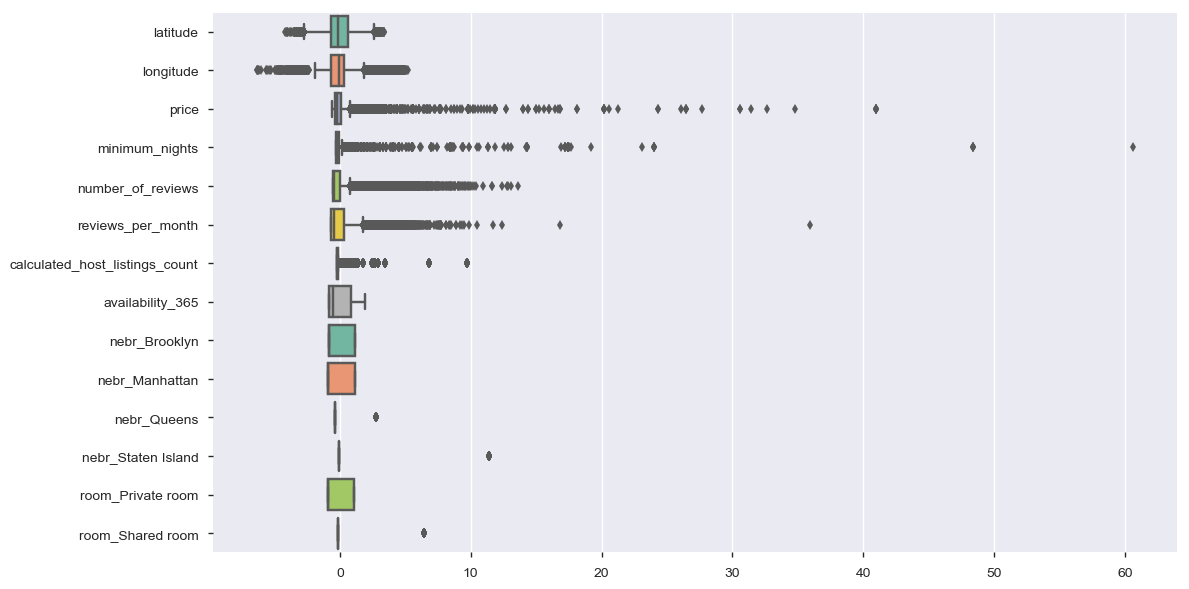

In [40]:
def plotoutliers():
    import seaborn as sns
    sns.catplot(data=rfreg, orient="h", palette="Set2", kind="box", height=6, aspect=2)
    return None 
plotoutliers()

In [41]:
def outliers(data):
    import pandas as pd
    Q1 = data.quantile(0.05)
    Q3 = data.quantile(0.95)
    Q_diff = Q3 - Q1
    XYZ = data[~((data < (Q1 - Q_diff))|(data > (Q3 + Q_diff))).any(axis=1)]
    print(data[((data < (Q1 - Q_diff))|(data > (Q3 + Q_diff))).any(axis=1)])
    return XYZ
rfreg = outliers(rfreg)
rfreg

       latitude  longitude     price  minimum_nights  number_of_reviews  \
3     -0.803398  -0.164450 -0.265335       -0.293996           5.538156   
7      0.659113  -0.709771 -0.306975       -0.245240           9.129616   
14     0.116471  -1.150015 -0.136250        4.045279           0.083626   
17     0.237873  -0.928160 -0.052969       -0.293996           5.313689   
30     1.714688   0.024474 -0.427732       -0.196484           4.909650   
33     1.693599  -0.021891 -0.427732       -0.196484           5.605495   
36    -0.737011   0.196065 -0.490193        2.582602          -0.522433   
37    -0.496775   0.535564 -0.281991       -0.245240           4.662737   
39    -0.273960  -0.801633 -0.469373       -0.293996           4.281145   
40    -0.110929  -0.646075 -0.352780       -0.245240           4.976990   
46     0.344054   0.103336 -0.094610       -0.196484           5.044330   
53     0.112070  -0.037923 -0.036313       -0.245240           6.840060   
57     0.483428  -0.88309

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nebr_Brooklyn,nebr_Manhattan,nebr_Queens,nebr_Staten Island,room_Private room,room_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,1.196705,-0.891833,-0.362035,-0.087677,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
5,0.343321,-0.494632,0.196873,-0.196484,1.138617,-0.313604,-0.186451,0.123223,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
6,-0.771488,-0.082121,-0.386092,1.851263,0.577451,-0.432558,-0.186451,-0.856865,1.196705,-0.891833,-0.362035,-0.087677,1.090893,-0.155887
8,1.335627,-0.326291,-0.306975,-0.245240,2.126269,-0.063177,-0.186451,-0.856865,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887
9,-0.284413,-0.827632,-0.011329,-0.293996,3.069027,0.149687,-0.095410,0.571480,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
10,1.360935,-0.287727,-0.073790,-0.098973,0.667238,-0.413776,-0.186451,-0.811279,-0.835628,1.121286,-0.362035,-0.087677,-0.916680,-0.155887
11,0.583374,-0.790800,-0.281991,-0.245240,3.697532,0.256119,-0.186451,-0.560559,-0.835628,1.121286,-0.362035,-0.087677,1.090893,-0.155887


In [42]:
DATASET_R = rfreg.copy(deep=True)   
DATASET_R.sample()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nebr_Brooklyn,nebr_Manhattan,nebr_Queens,nebr_Staten Island,room_Private room,room_Shared room
47312,-0.295599,0.203431,1.008859,-0.24524,-0.522433,-0.682986,-0.186451,1.809884,1.196705,-0.891833,-0.362035,-0.087677,-0.91668,-0.155887


<a id=section501></a>

<a id=section502></a>

### 5.2 Preparing X and Y

In [43]:
feature_cols = ['minimum_nights',
       'number_of_reviews','latitude', 'longitude',
       'calculated_host_listings_count', 'availability_365', 'nebr_Brooklyn',
       'nebr_Manhattan', 'nebr_Queens', 'nebr_Staten Island',
       'room_Private room', 'room_Shared room']  
X = DATASET_R[feature_cols]                         # use the list to select a subset of the original DataFrame-+
y = np.log1p(DATASET_R.price)

<a id=section502></a>

<a id=section503></a>

### 5.3 Splitting X and y into training and test datasets

In [44]:
from sklearn.model_selection import train_test_split  #old name cross_validation

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
    
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (35153, 12)
y_train shape:  (35153,)

Test cases as below
X_test shape:  (8789, 12)
y_test shape:  (8789,)


<a id=section503></a>

<a id=section504></a>

### 5.4 Random forest regression in scikit-learn

In [45]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 0)

model.fit(X_train, y_train)

C:\Users\Ranjini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<a id=section504></a>

<a id=section505></a>

### 5.5 Using the Model for Prediction

In [46]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

<a id=section505></a>

<a id=section506></a>

### 5.6 Feature selection

In [47]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), feature_cols), 
             reverse=True))

Features sorted by their score:
[(0.3712, 'room_Private room'), (0.209, 'longitude'), (0.1736, 'latitude'), (0.0917, 'availability_365'), (0.0686, 'number_of_reviews'), (0.0524, 'minimum_nights'), (0.0288, 'calculated_host_listings_count'), (0.0022, 'nebr_Manhattan'), (0.0015, 'nebr_Queens'), (0.0011, 'nebr_Brooklyn'), (0.0, 'room_Shared room'), (0.0, 'nebr_Staten Island')]


__Removing__ the __four least scored features__ and predicting the model.

In [48]:
feature_cols = ['minimum_nights',
       'number_of_reviews', 'latitude', 'longitude',
       'calculated_host_listings_count', 'availability_365',
       'nebr_Manhattan',
       'room_Private room',]  
X = DATASET_R[feature_cols]                         # use the list to select a subset of the original DataFrame-+
y = np.log1p(DATASET_R.price)

In [49]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor

modelf = RandomForestRegressor(n_estimators = 20, random_state = 0)

modelf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
y_pred_trainf = modelf.predict(X_train)
y_pred_testf = modelf.predict(X_test)

<a id=section506></a>

<a id=section5></a>

<a id=section6></a>

### 6. Model Evaluation

We need an evaluation metric in order to compare our predictions with the actual values.<br/>

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>

<a id=section601></a>

### 6.1 Root Mean Squared Error

__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

<a id=section601></a>

<a id=section602></a>

### 6.2 R-Squared value

- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control overfitting).

<a id=section602></a>

<a id=section603></a>

### 6.3 Model 1 Evaluation

In [51]:
# evaluating the model 1 on training dataset
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
r2_train = metrics.r2_score(y_train, y_pred_train)
adjusted_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  
# evaluating the model 1 on test dataset
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
r2_test = metrics.r2_score(y_test, y_pred_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  
print("The model 1 performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
print("Adjusted R2 score of training set is {}".format(adjusted_r2_train))
  
print("\n")
  
print("The model 1 performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))
print("Adjusted R2 score of test set is {}".format(adjusted_r2_test))


The model 1 performance for the training set
-------------------------------------------
RMSE of training set is 0.10310511935232633
R2 score of training set is 0.9187032037847411
Adjusted R2 score of training set is 0.9186754416460222


The model 1 performance for the test set
-------------------------------------------
RMSE of test set is 0.24448142294001424
R2 score of test set is 0.5333055827562643
Adjusted R2 score of test set is 0.5326674408913002


<a id=section603></a>

<a id=section604></a>

### 6.4 Model 2 Evaluation

In [52]:
# evaluating the model 2 on training dataset
rmse_trainf = np.sqrt(metrics.mean_squared_error(y_train, y_pred_trainf))
r2_trainf = metrics.r2_score(y_train, y_pred_trainf)
adjusted_r2_trainf = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  
# evaluating the model 2 on test dataset
rmse_testf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_testf))
r2_testf = metrics.r2_score(y_test, y_pred_testf)
adjusted_r2_testf = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  
print("The model 2 performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_trainf))
print("R2 score of training set is {}".format(r2_trainf))
print("Adjusted R2 score of training set is {}".format(adjusted_r2_trainf))
  
print("\n")
  
print("The model 2 performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_testf))
print("R2 score of test set is {}".format(r2_testf))
print("Adjusted R2 score of test set is {}".format(adjusted_r2_testf))

The model 2 performance for the training set
-------------------------------------------
RMSE of training set is 0.09511112061002108
R2 score of training set is 0.9308207945545479
Adjusted R2 score of training set is 0.9186754416460222


The model 2 performance for the test set
-------------------------------------------
RMSE of test set is 0.2382053888732251
R2 score of test set is 0.5569588752270962
Adjusted R2 score of test set is 0.5326674408913002


<a id=section604></a>

<a id=section605></a>

### 6.5 Observation

In [53]:
rest = { 'Random Forest' : ['Model1','Model2(Feature Selection)'],       #Declaring a Dictionary
'RMSE Train' : [rmse_train,rmse_trainf],
'RMSE Predicted' : [rmse_testf,rmse_testf],
'R2 Train' : [r2_train,r2_trainf],
'R2 Predicted' : [r2_test,r2_testf],
'Adjusted R2 Train' : [adjusted_r2_train, adjusted_r2_trainf],
'Adjusted R2 Predicted' : [adjusted_r2_test, adjusted_r2_testf]}

results = pd.DataFrame(rest)         #Creating a Data Frame  
results

,Random Forest,RMSE Train,RMSE Predicted,R2 Train,R2 Predicted,Adjusted R2 Train,Adjusted R2 Predicted
0,Model1,0.103105,0.238205,0.918703,0.533306,0.918675,0.532667
1,Model2(Feature Selection),0.095111,0.238205,0.930821,0.556959,0.918675,0.532667


Above table helps us compare the evaluated models.  There is a minor difference between the two models.  Model 2 has got better scores due to the feature selection.

<a id=section605></a>

<a id=section606></a>

### 6.6 Residual distribution

Apart from the Metric and R-Sqaured check the residual distribution can be checked to know how well the model fits.  **The residuals** should be **normally distributed**.

In [54]:
errortrain = pd.DataFrame()
errortrain['Model 1 Train'] = y_train - y_pred_train
errortest = pd.DataFrame()
errortest['Model 1 Test'] = y_test - y_pred_test
errortrainf = pd.DataFrame()
errortrainf['Model 2 Train'] = y_train - y_pred_trainf
errortestf = pd.DataFrame()
errortestf['Model 2 Test'] = y_test - y_pred_testf

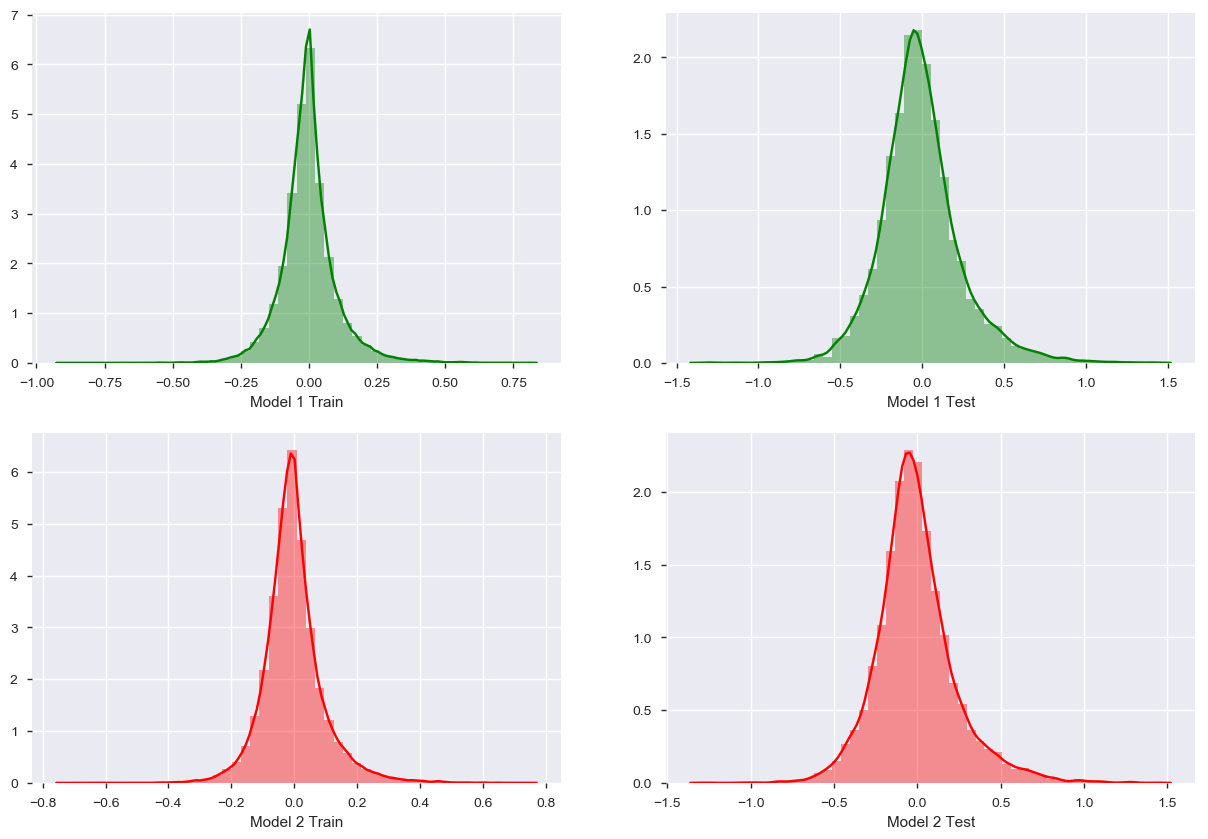

In [55]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.distplot(errortrain['Model 1 Train'], ax = axes[0,0], color='g')
sns.distplot(errortest['Model 1 Test'], ax = axes[0,1], color='g')
sns.distplot(errortrainf['Model 2 Train'], ax = axes[1,0], color='r')
sns.distplot(errortestf['Model 2 Test'], ax = axes[1,1], color='r')

<a id=section606></a>

<a id=section6></a>